<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S6_C3_RegLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nos permite generar datos artificiales  de clasificación
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Datos

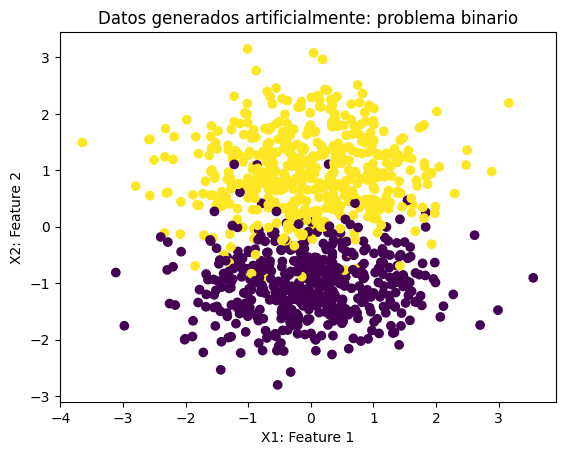

In [ ]:
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(X[:,0], X[:,1], marker='o', c = Y)
plt.xlabel('X1: Feature 1')
plt.ylabel('X2: Feature 2')
plt.title('Datos generados artificialmente: problema binario')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [ ]:
model_regLog = LogisticRegression()

In [ ]:
model_regLog.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print(f'Coeficientes del modelo: {model_regLog.coef_}')
print(f'Intercepto: {model_regLog.intercept_}')

Coeficientes del modelo: [[-0.23194978  4.14918409]]
Intercepto: [0.44832614]


In [ ]:
y_predict = model_regLog.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_predict)
recall = recall_score(Y_test, y_predict)
print(f'Accuracy: {accuracy}')
print(f'recall: {recall}')

Accuracy: 0.94
recall: 0.9523809523809523


In [ ]:
confMatrix = confusion_matrix(Y_test, y_predict)
print(confMatrix)


[[ 88   7]
 [  5 100]]


Text(8.222222222222223, 0.5, 'Valores reales')

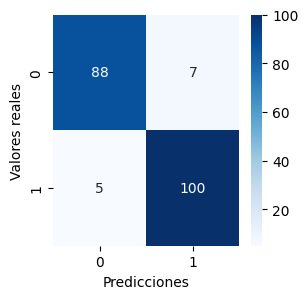

In [ ]:
plt.figure(figsize=(3,3))
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')


<Figure size 100x100 with 0 Axes>

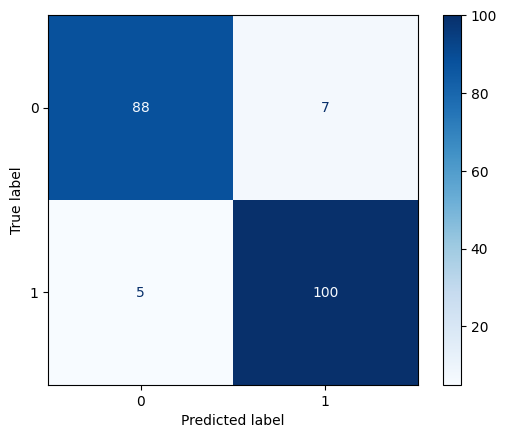

In [ ]:
plt.figure(figsize=(1,1))
matrix = ConfusionMatrixDisplay(confusion_matrix=confMatrix)
matrix.plot(cmap='Blues')
plt.show()

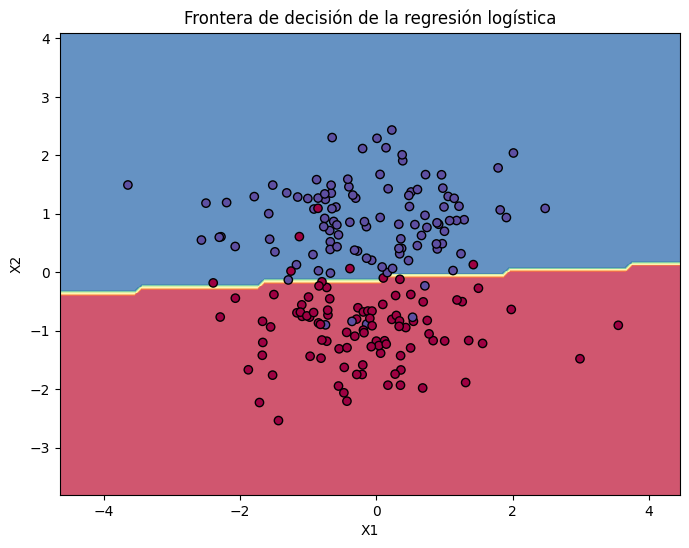

In [ ]:
# Visualización de la frontera de decisión
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model_regLog.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Spectral)

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', marker="o", cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Frontera de decisión de la regresión logística')
plt.show()


In [ ]:
np.arange(x_min, x_max, 2)


array([-4.6471575, -2.6471575, -0.6471575,  1.3528425,  3.3528425])

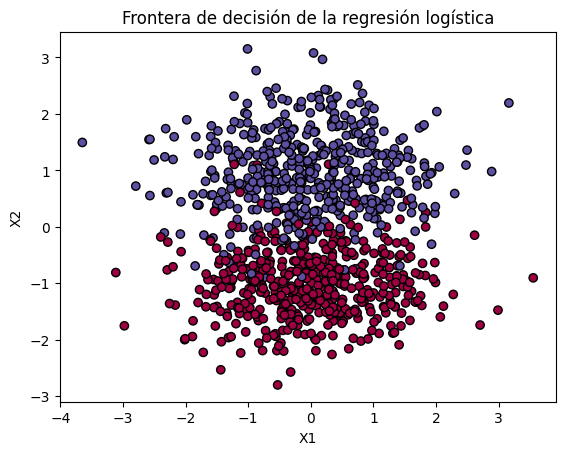

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker="o", cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Frontera de decisión de la regresión logística')
plt.show()